In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/souha/downloads/ckw_opendata_smartmeter_dataset_a_202503.csv.gz", compression='gzip')
df.head()


,id,timestamp,value_kwh
0,39ceb03ed301bf2a02e05c21cf957f3b,2025-03-14T02:15:00.000Z,0.007
1,39ceb03ed301bf2a02e05c21cf957f3b,2025-03-16T11:15:00.000Z,0.017
2,39ceb03ed301bf2a02e05c21cf957f3b,2025-03-16T17:30:00.000Z,0.052
3,39ceb03ed301bf2a02e05c21cf957f3b,2025-03-18T18:15:00.000Z,0.057
4,39ceb03ed301bf2a02e05c21cf957f3b,2025-03-19T02:15:00.000Z,0.014


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)

df['timestamp'] = df['timestamp'].dt.tz_convert('CET')
df.head()

,id,timestamp,value_kwh
0,39ceb03ed301bf2a02e05c21cf957f3b,2025-03-14 03:15:00+01:00,0.007
1,39ceb03ed301bf2a02e05c21cf957f3b,2025-03-16 12:15:00+01:00,0.017
2,39ceb03ed301bf2a02e05c21cf957f3b,2025-03-16 18:30:00+01:00,0.052
3,39ceb03ed301bf2a02e05c21cf957f3b,2025-03-18 19:15:00+01:00,0.057
4,39ceb03ed301bf2a02e05c21cf957f3b,2025-03-19 03:15:00+01:00,0.014


In [4]:
df.shape

(286499985, 3)

In [5]:
df.describe()

,value_kwh
count,2.865000e+08
mean,1.096056e-01
std,2.261725e-01
min,0.000000e+00
25%,1.400000e-02
50%,3.500000e-02
75%,9.400000e-02
max,2.470000e+02


In [6]:
df.set_index('timestamp', inplace=True)
df.head()

,id,value_kwh
timestamp,,
2025-03-14 03:15:00+01:00,39ceb03ed301bf2a02e05c21cf957f3b,0.007
2025-03-16 12:15:00+01:00,39ceb03ed301bf2a02e05c21cf957f3b,0.017
2025-03-16 18:30:00+01:00,39ceb03ed301bf2a02e05c21cf957f3b,0.052
2025-03-18 19:15:00+01:00,39ceb03ed301bf2a02e05c21cf957f3b,0.057
2025-03-19 03:15:00+01:00,39ceb03ed301bf2a02e05c21cf957f3b,0.014


In [7]:
df.sort_index(inplace=True)
df.head()

,id,value_kwh
timestamp,,
2025-03-01 00:00:00+01:00,0dffdb411f646814f2031d8434c881cd,0.014
2025-03-01 00:00:00+01:00,49f5fc54e2d4fa629ae0263fa2fb55a8,0.510
2025-03-01 00:00:00+01:00,eee66afc63e7af37730debeb45f42dad,0.021
2025-03-01 00:00:00+01:00,bb6399b0b7f5ad63ee226b367ce53dc8,0.085
2025-03-01 00:00:00+01:00,eb742fef7c50ee2215edda889d92f1d6,0.025


Summary Statistics for 'id':
count                            286499985
unique                              158141
top       c2e0ea0d8fae46e5633a186ae9174f1c
freq                                  1831
Name: id, dtype: object 

Number of unique IDs: 158141 

Frequency Distribution of 'id':
id
c2e0ea0d8fae46e5633a186ae9174f1c    1831
3f6292a1f6ad4f60c5155bd5efa99002    1831
a2a61f5b81aece37d35e11cd0f13f675    1831
ab59be154af5d760bb497f3113658b4a    1831
4e4fd6d07feb06f1fcc72df6c0425a95    1831
                                    ... 
1bb9d79d9cbac69aceff55b3691756e4      49
feaef093593e925de23f6a1a029dadc1      46
5922a475bc522a5786e238c9b1264052      35
6c7d5113b1862c162ed72a8b2fab1fec      28
bfdd4bad77bf85afc839826f868e50b3       9
Name: count, Length: 158141, dtype: int64 

Number of missing values in 'id': 0 



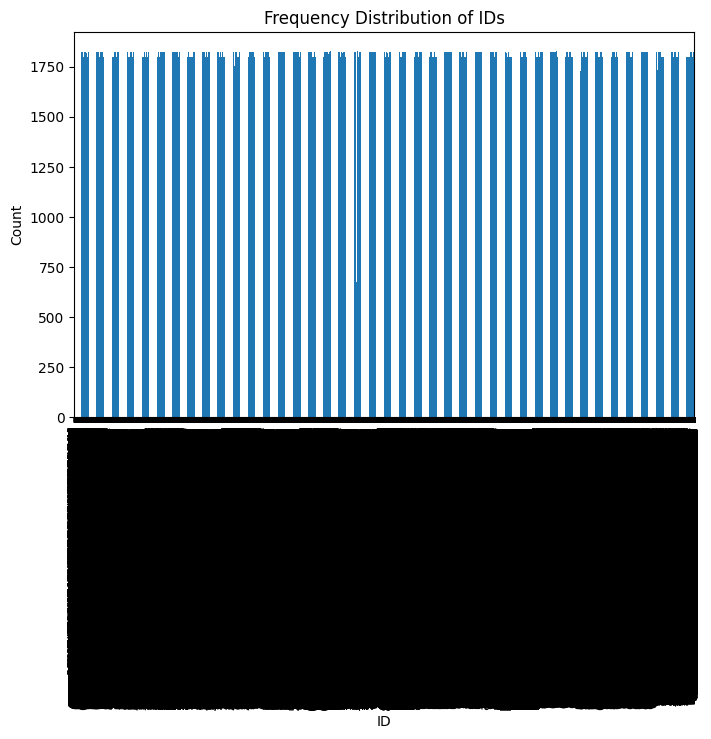

In [ ]:
import matplotlib.pyplot as plt

# 1. Summary statistics of the id column
print("Summary Statistics for 'id':")
print(df['id'].describe(), "\n")

# 2. Number of unique IDs
unique_ids = df['id'].nunique()
print("Number of unique IDs:", unique_ids, "\n")

# 3. Frequency distribution of id values
id_counts = df['id'].value_counts()
print("Frequency Distribution of 'id':")
print(id_counts, "\n")

# 4. Check for missing values in the id column
missing_ids = df['id'].isnull().sum()
print("Number of missing values in 'id':", missing_ids, "\n")

In [ ]:
df['id'].value_counts()

Summary Statistics for 'value_kwh':
count    2.865000e+08
mean     1.096056e-01
std      2.261725e-01
min      0.000000e+00
25%      1.400000e-02
50%      3.500000e-02
75%      9.400000e-02
max      2.470000e+02
Name: value_kwh, dtype: float64 

Number of missing values in 'value_kwh': 0 



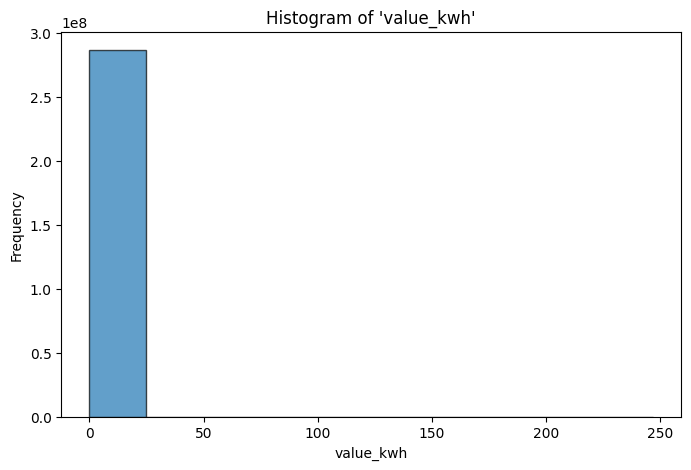

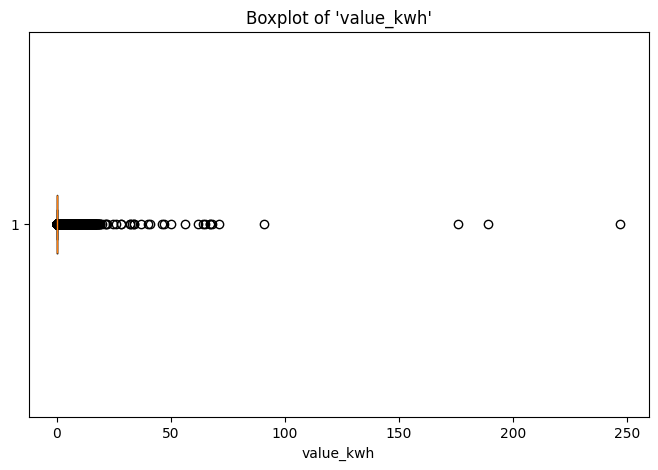

In [ ]:
# 1. Summary statistics of the value_kwh column
print("Summary Statistics for 'value_kwh':")
print(df['value_kwh'].describe(), "\n")

# 2. Check for missing values in the value_kwh column
missing_value_kwh = df['value_kwh'].isnull().sum()
print("Number of missing values in 'value_kwh':", missing_value_kwh, "\n")

# 3. Histogram of the value_kwh column
plt.figure(figsize=(8, 5))
plt.hist(df['value_kwh'], bins=10, edgecolor='k', alpha=0.7)
plt.title("Histogram of 'value_kwh'")
plt.xlabel("value_kwh")
plt.ylabel("Frequency")
plt.show()

# 4. Boxplot for the value_kwh column (helps in detecting outliers)
plt.figure(figsize=(8, 5))
plt.boxplot(df['value_kwh'], vert=False)
plt.title("Boxplot of 'value_kwh'")
plt.xlabel("value_kwh")
plt.show()

In [24]:
import nbformat
print(nbformat.__version__)

5.10.4


In [38]:
import plotly.graph_objects as go

# Aggregate the data into histogram bins (for all customers)
hist, bin_edges = np.histogram(df['value_kwh'], bins=10000)

# Create a bar chart using the aggregated data and set the marker color to #204251
fig = go.Figure(
    data=[go.Bar(x=bin_edges[:-1], y=hist, width=np.diff(bin_edges), marker_color='#204251')]
)

fig.update_layout(
    title='Histogram of value_kwh',
    xaxis_title='Value (kWh)',
    yaxis_title='Frequency'
)

fig.show(renderer='browser')

In [45]:
import plotly.graph_objects as go

# Sample a subset of the data (adjust n to a suitable size)
sample_df = df['value_kwh'].sample(n=1000000, random_state=42)

# Create a box plot for the sampled value_kwh column with the specified color
fig = go.Figure(
    data=[go.Box(y=sample_df, marker_color='#204251')]
)

fig.update_layout(
    title='Box Plot of value_kwh (Sampled)',
    yaxis_title='Value (kWh)'
)

fig.show(renderer='browser')


In [34]:
import plotly.express as px

# Filter for a specific id
selected_id = "ab59be154af5d760bb497f3113658b4a"
df_filtered = df[df['id'] == selected_id].sort_index()

# Plot the time series where the index is the timestamp
fig = px.line(
    df_filtered,
    x=df_filtered.index,  # Using the DateTimeIndex
    y='value_kwh',
    title=f"Time Series of kWh for ID {selected_id}",
    labels={'x': 'Timestamp', 'value_kwh': 'Energy Consumption (kWh)'},
    color_discrete_sequence=['#204251']
)
fig.show(renderer='browser')

